In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import scipy
import nltk
from scipy.sparse import coo_matrix, hstack
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('C:/Users/Dindar/crowdflower/tables1/train.csv')
test = pd.read_csv('C:/Users/Dindar/crowdflower/tables1/test.csv')

In [3]:
df = train[train['query'] == 'bridal shower decorations']
df['product_description'].fillna('0', inplace=True)

C:\Users\Dindar\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
stop_words = set(stopwords.words('english')) 

In [5]:
df['query'] = df['query'].str.lower()
df['product_title'] = df['product_title'].str.lower()
df['product_description'] = df['product_description'].str.lower()

C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [6]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [7]:
df['query'] = df['query'].apply(lemmatize_text)
df['product_title'] = df['product_title'].apply(lemmatize_text)
df['product_description'] = df['product_description'].apply(lemmatize_text)

C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [8]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 = str1 + ' ' + ele      
    return str1[1:]

In [9]:
df['query'] = df['query'].apply(listToString)
df['product_title'] = df['product_title'].apply(listToString)
df['product_description'] = df['product_description'].apply(listToString)

C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [10]:
vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 7))
vectorizer1 = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 7))
vectorizer2 = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 7))

In [90]:
vectorizer3 = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 4), analyzer='char')
X3 = vectorizer3.fit_transform(df['product_description'])
vectorizer4 = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 4), analyzer='char')
X4 = vectorizer4.fit_transform(df['product_title'])

In [11]:
X = vectorizer.fit_transform(df['query'])
X1 = vectorizer1.fit_transform(df['product_title'])
X2 = vectorizer2.fit_transform(df['product_description'])

In [91]:
tr = hstack([X1,X2,X3, X4])

In [74]:
ts = df['median_relevance']

In [75]:
from sklearn.model_selection import LeaveOneOut
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [76]:
loo = LeaveOneOut()

In [92]:
%%time
y_ts = []
y_pr = []
for train_index, test_index in loo.split(tr):
    X_train, X_test = tr.A[train_index], tr.A[test_index]
    y_train, y_test = ts.values[train_index], ts.values[test_index]
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_preds = xgb.predict(X_test)
    y_ts.append(y_test)
    y_pr.append(y_preds)

Wall time: 1min 39s


In [93]:
cohen_kappa_score(y_ts, y_pr,weights='quadratic')

0.4874172185430463

In [24]:
cohen_kappa_score(y_ts, y_pr,weights='quadratic')

0.518117295480015

In [25]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

In [94]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(tr.A)

In [58]:
X_reduced.shape

(43, 5)

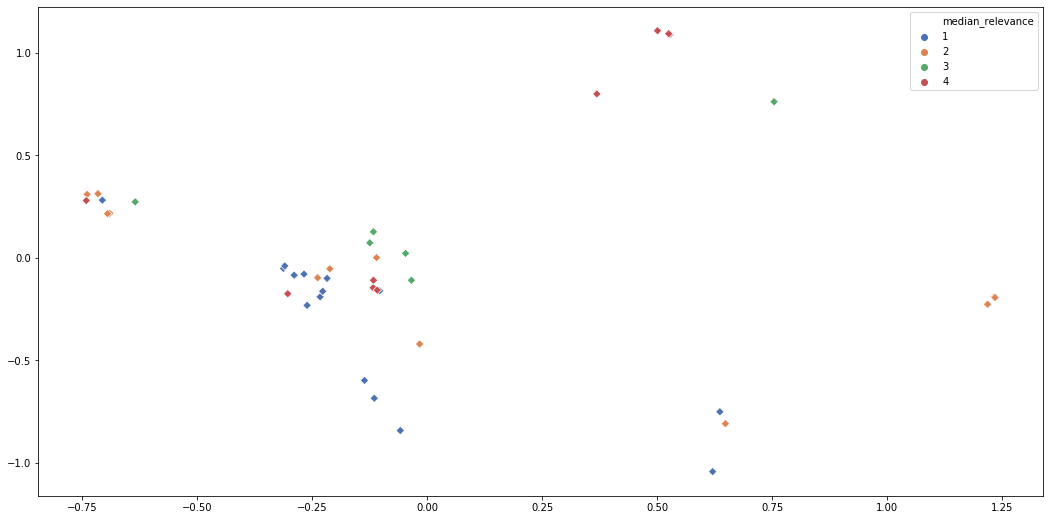

In [95]:
plt.figure(figsize=(18, 9))
sns.scatterplot(X_reduced[:,0], X_reduced[:,1], hue=ts, marker='D',palette='deep')

In [96]:
%%time
y_ts = []
y_pr = []
for train_index, test_index in loo.split(X_reduced):
    X_train, X_test = X_reduced[train_index], X_reduced[test_index]
    y_train, y_test = ts.values[train_index], ts.values[test_index]
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_preds = xgb.predict(X_test)
    y_ts.append(y_test)
    y_pr.append(y_preds)

Wall time: 3.44 s


In [97]:
cohen_kappa_score(y_ts, y_pr ,weights='quadratic')
#vectorizer3 = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 4), analyzer='char')
#X3 = vectorizer3.fit_transform(df['product_description'])
#vectorizer4 = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 4), analyzer='char')
#X4 = vectorizer4.fit_transform(df['product_title'])

0.5376344086021505

In [98]:
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
X_reduced1 = svd.fit_transform(tr)

In [ ]:
X_reduced1

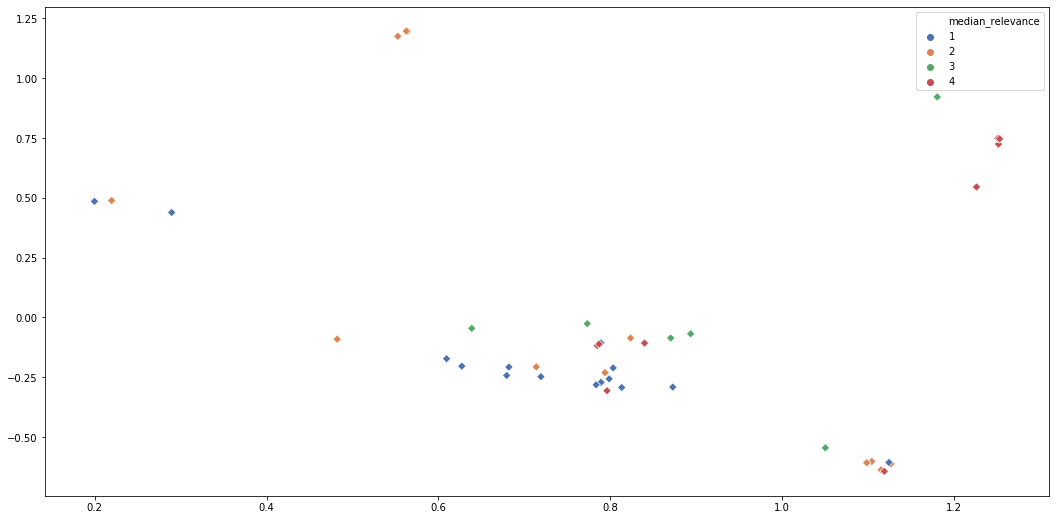

In [99]:
plt.figure(figsize=(18, 9))
sns.scatterplot(X_reduced1[:,0], X_reduced1[:,1], hue=ts, marker='D',palette='deep')

In [100]:
%%time
y_ts = []
y_pr = []
for train_index, test_index in loo.split(X_reduced1):
    X_train, X_test = X_reduced1[train_index], X_reduced1[test_index]
    y_train, y_test = ts.values[train_index], ts.values[test_index]
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_preds = xgb.predict(X_test)
    y_ts.append(y_test)
    y_pr.append(y_preds)

Wall time: 3.52 s


In [101]:
cohen_kappa_score(y_ts, y_pr ,weights='quadratic')

0.3517587939698493

In [37]:
cohen_kappa_score(y_ts, y_pr ,weights='quadratic')# des char 1,4, compon = 10

0.5412221144519884

In [38]:
from sklearn.manifold import TSNE

In [102]:
X_embedded = TSNE(n_components=2).fit_transform(tr)

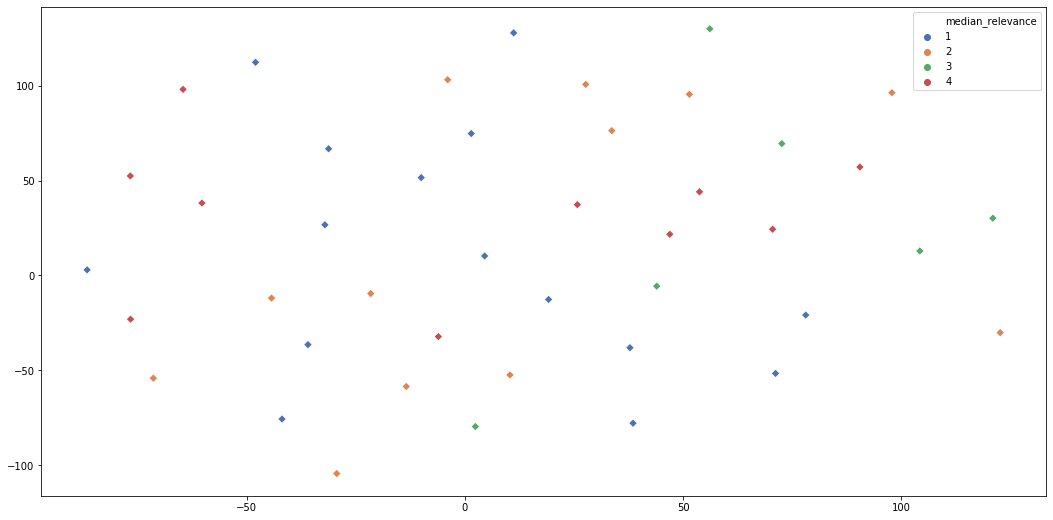

In [103]:
plt.figure(figsize=(18, 9))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=ts, marker='D',palette='deep')

In [104]:
%%time
y_ts = []
y_pr = []
for train_index, test_index in loo.split(X_embedded):
    X_train, X_test = X_embedded[train_index], X_embedded[test_index]
    y_train, y_test = ts.values[train_index], ts.values[test_index]
    xgb = XGBClassifier(n_estimators=50)
    xgb.fit(X_train, y_train)
    y_preds = xgb.predict(X_test)
    y_ts.append(y_test)
    y_pr.append(y_preds)

Wall time: 2.51 s


In [105]:
cohen_kappa_score(y_ts, y_pr ,weights='quadratic')

0.36101398601398615